In [2]:
import sys
from pathlib import Path
sys.path.insert(0,str(Path(r'C:\Users\ku51015\CHMURA\mystuff\Graph-Vizualisation-Rating-Metric').resolve()))

from graph_generating_script import *
from graph_metric_script import *
import matplotlib.pyplot as plt
import igraph as ig
import numpy as np
import pickle
import os

In [4]:

# List of layouts
np.random.seed(212)
def draw_five_layouts(G, graph_id, true_labels=None, node_size=300):
    G_ig = ig.Graph.TupleList(nx.to_edgelist(G), directed=False)
    missing_vertices = set(G.nodes()) - set(G_ig.vs['name'])
    G_ig.add_vertices(list(missing_vertices))
    layouts = [
        # nx.circular_layout(G),
        nx.random_layout(G),
        nx.kamada_kawai_layout(G),
        G_ig.layout('davidson_harel'),
        G_ig.layout('graphopt'),
        G_ig.layout('lgl'),
    ]
    layout_names = ['random', 'kamada_kawai', 'davidson_harel', 'graphopt', 'lgl']
    # Create a 2x5 subplot
    fig, axes = plt.subplots(1, 5, figsize=(20, 3.5))

    # Draw the graph using each layout
    for ax, pos, layout_name in zip(axes.flatten(), layouts, layout_names):
        # pos = layout(G)
        if true_labels is not None:
            nx.draw(G, pos, with_labels=True, edge_color='gray', node_color=true_labels, node_size=node_size, font_size=10, ax=ax)
        else:
            nx.draw(G, pos, with_labels=True, edge_color='gray', node_size=node_size, font_size=10, ax=ax)
        ax.set_title(layout_name)

    file_path = f'layouts_img/{graph_id}_all_layouts_img.png'

    if os.path.exists(file_path):
        raise FileExistsError(f"The file {file_path} already exists.")
    else:
        fig.savefig(file_path)
        
    plt.show()
    return layouts

In [5]:
def save_posdfs(G, layouts, graph_id):
    layout_names = ['random', 'kamada_kawai', 'davidson_harel', 'graphopt', 'lgl']

    # Save each layout to a file
    for layout, name in zip(layouts, layout_names):
        if name in ['random', 'kamada_kawai']:
            posdf = pd.DataFrame.from_dict(layout, orient='index', columns=['X', 'Y'])
        else:
            posdf = pd.DataFrame(layout.coords, columns=['X', 'Y'])

        file_path = f'pos_dfs/{graph_id}_{name}.csv'

        if os.path.exists(file_path):
            raise FileExistsError(f"The file {file_path} already exists.")
        else:
            posdf.to_csv(file_path, index=False)


    file_path = f'graph_objects/graph_{graph_id}.pkl'
    if os.path.exists(file_path):
        raise FileExistsError(f"The file {file_path} already exists.")
    else:
        with open(file_path, 'wb') as f:
            pickle.dump(G, f)

# Example

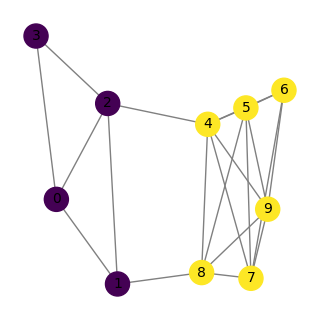

In [22]:
np.random.seed(212)

(G, true_labels) = generate_G_randomized(10, 2, .8, .1)
nx.numeric_assortativity_coefficient(G, "community")
plt.figure(figsize=(3,3))
nx.draw(G, with_labels=True, node_color=true_labels, edge_color='gray', node_size=300, font_size=10)


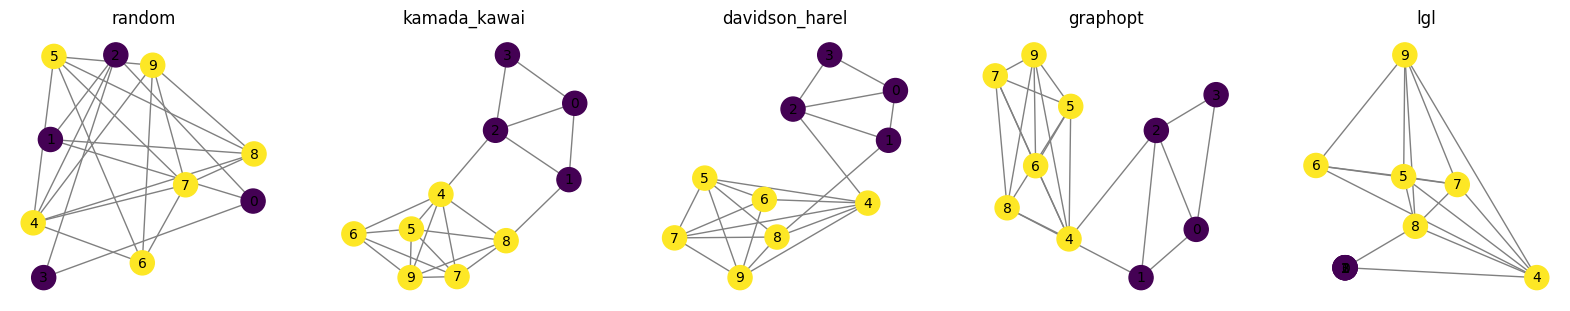

In [26]:
layouts = draw_five_layouts(G, 0, true_labels)
save_posdfs(G, layouts, 0)

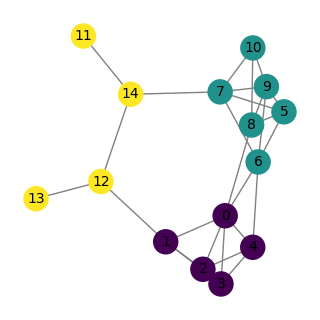

In [34]:
np.random.seed(212)

(G, true_labels) = generate_G_randomized(15, 3, .8, .05)
nx.numeric_assortativity_coefficient(G, "community")
plt.figure(figsize=(3,3))
nx.draw(G, with_labels=True, node_color=true_labels, edge_color='gray', node_size=300, font_size=10)


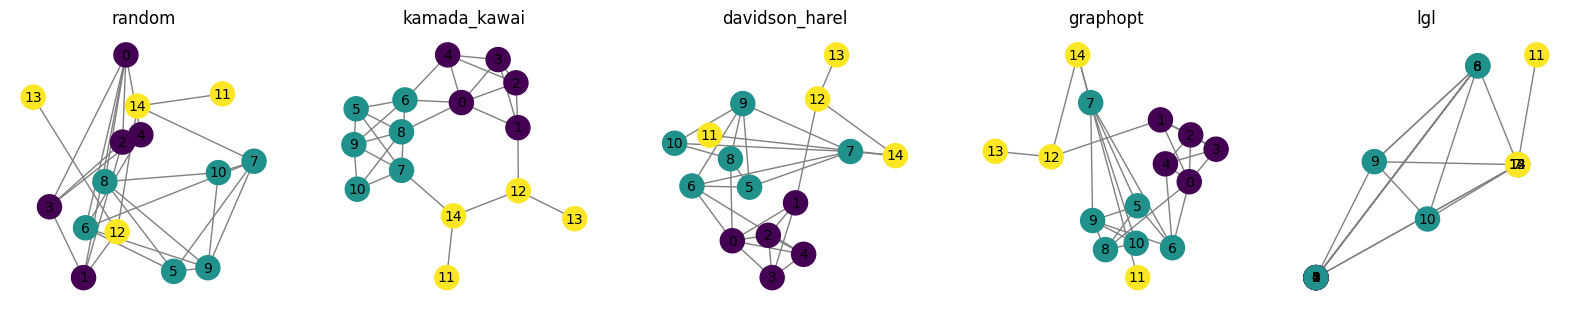

In [35]:
layouts = draw_five_layouts(G, 1, true_labels)
save_posdfs(G, layouts, 1)

# 2

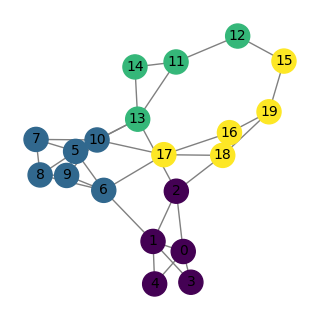

In [36]:
np.random.seed(212)

(G, true_labels) = generate_G_randomized(20, 4, .8, .05)
nx.numeric_assortativity_coefficient(G, "community")
plt.figure(figsize=(3,3))
nx.draw(G, with_labels=True, node_color=true_labels, edge_color='gray', node_size=300, font_size=10)


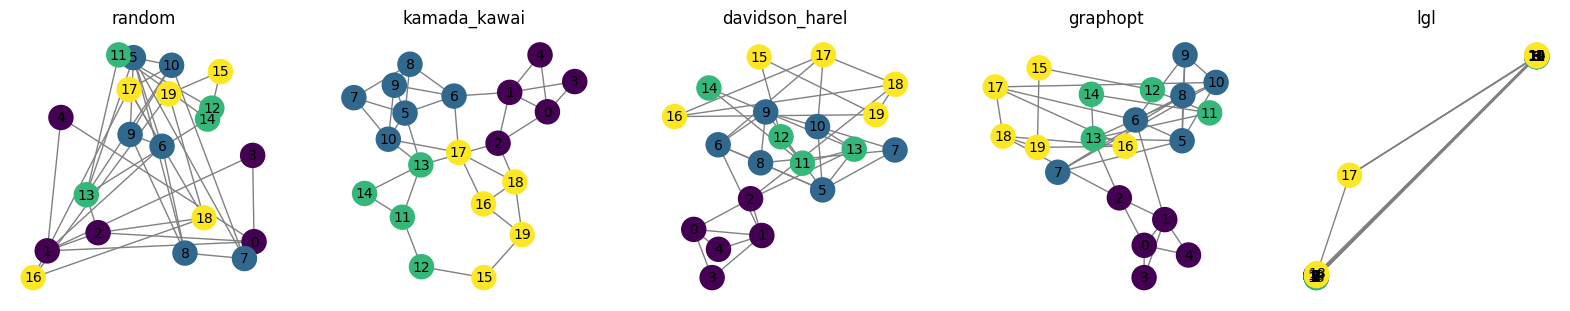

In [37]:
layouts = draw_five_layouts(G, 2, true_labels)
save_posdfs(G, layouts, 2)

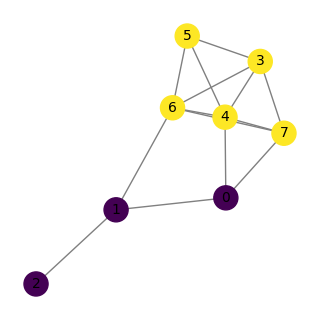

In [38]:
np.random.seed(212)

(G, true_labels) = generate_G_randomized(8, 2, .7, .1)
nx.numeric_assortativity_coefficient(G, "community")
plt.figure(figsize=(3,3))
nx.draw(G, with_labels=True, node_color=true_labels, edge_color='gray', node_size=300, font_size=10)


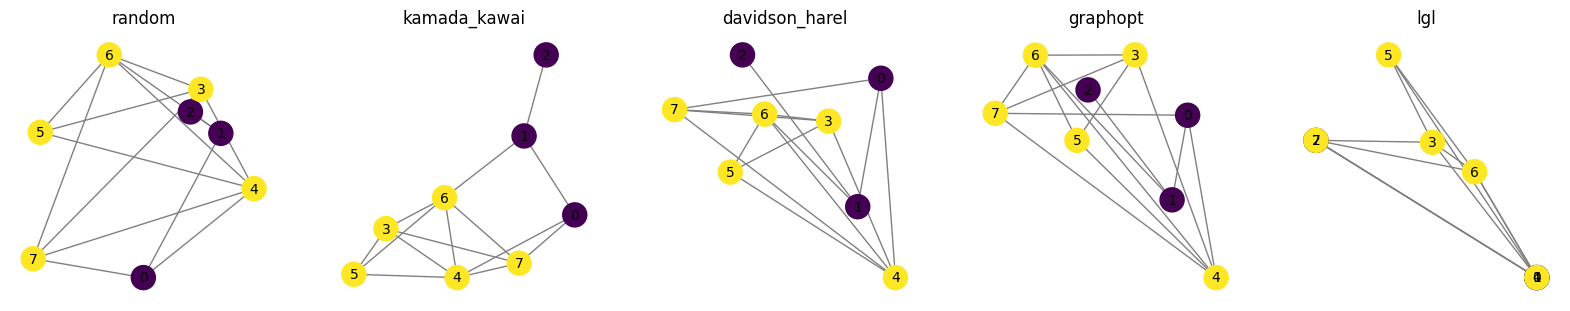

In [40]:
layouts = draw_five_layouts(G, 3, true_labels)
save_posdfs(G, layouts, 3)

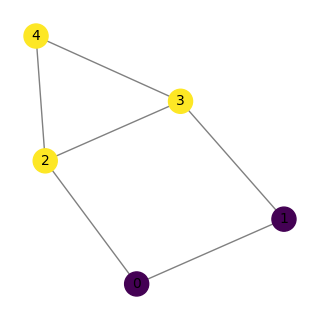

In [43]:
np.random.seed(212)

(G, true_labels) = generate_G_randomized(5, 2, .7, .1)
nx.numeric_assortativity_coefficient(G, "community")
plt.figure(figsize=(3,3))
nx.draw(G, with_labels=True, node_color=true_labels, edge_color='gray', node_size=300, font_size=10)


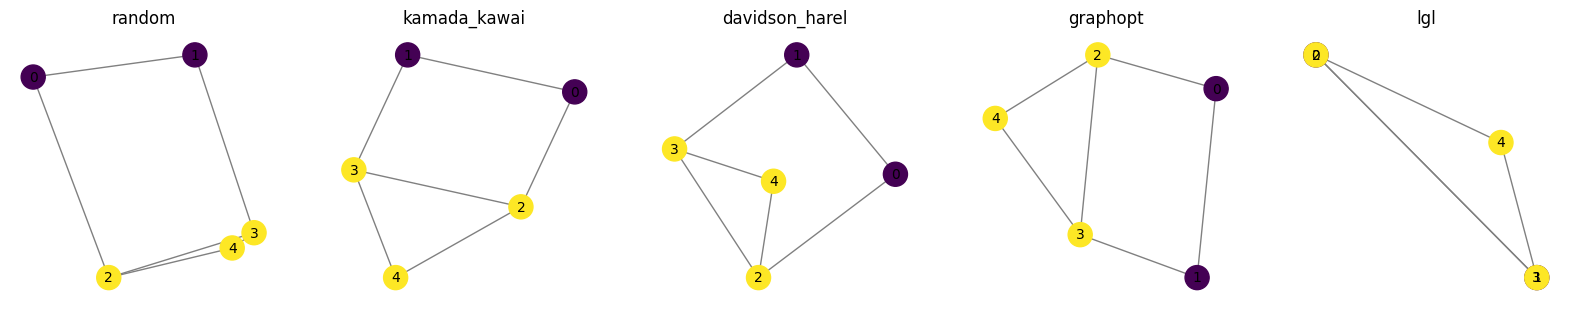

In [44]:
layouts = draw_five_layouts(G, 4, true_labels)
save_posdfs(G, layouts, 4)

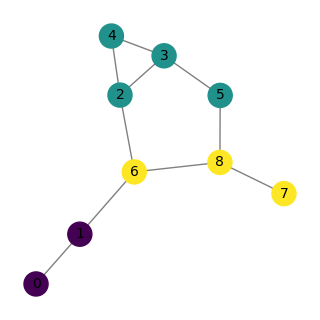

In [48]:
np.random.seed(212)

(G, true_labels) = generate_G_randomized(9, 3, .8, .1)
nx.numeric_assortativity_coefficient(G, "community")
plt.figure(figsize=(3,3))
nx.draw(G, with_labels=True, node_color=true_labels, edge_color='gray', node_size=300, font_size=10)


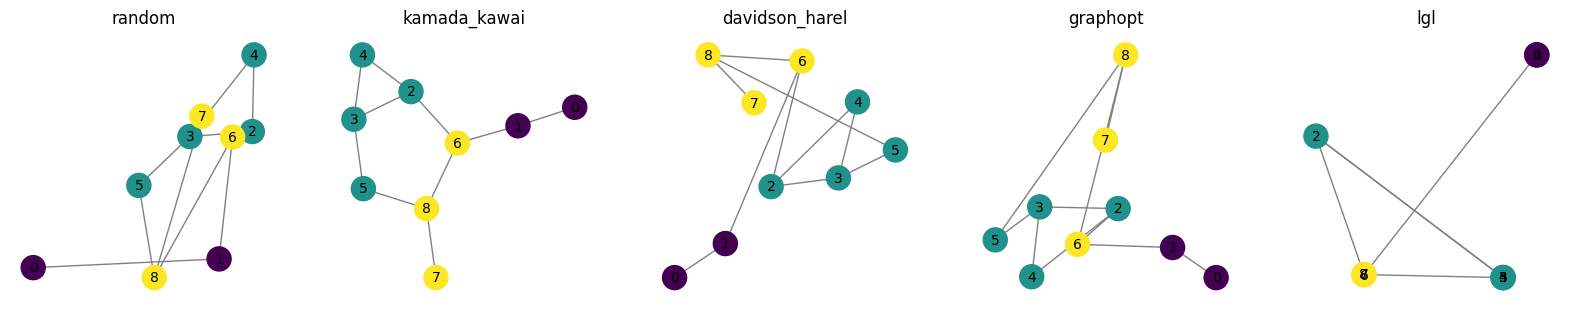

In [49]:
layouts = draw_five_layouts(G, 5, true_labels)
save_posdfs(G, layouts, 5)

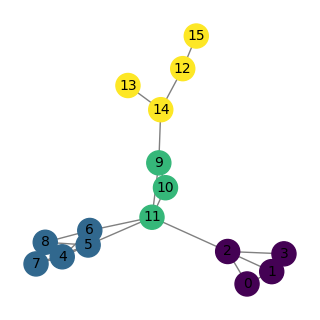

In [56]:
np.random.seed(212)

(G, true_labels) = generate_G_randomized(16, 4, .9, .05)
nx.numeric_assortativity_coefficient(G, "community")
plt.figure(figsize=(3,3))
nx.draw(G, with_labels=True, node_color=true_labels, edge_color='gray', node_size=300, font_size=10)


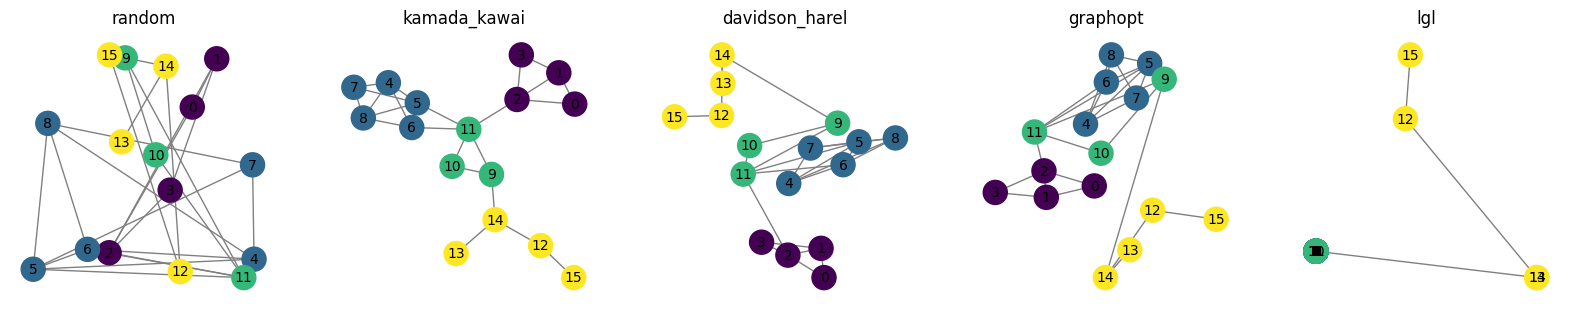

In [57]:
layouts = draw_five_layouts(G, 6, true_labels)
save_posdfs(G, layouts, 6)